**The dataset**
$$(X,Y)$$
 $m$ is the number of training examples in the dataset

**The model**
$$F(X)=Xθ$$
$$θ = (w,b)^T$$

**The cost function**
$$J(θ)=\frac{1}{2m}\sum\limits_{i = 1}^{m} (Xθ-Y)^{2}$$

**Gradient**
$$∇J(θ)=\frac{1}{m}X^T(Xθ-Y)$$

**Gradient descent**
$$θ ← θ-α∇J(θ)$$

We will fit the polynomial regression parameters  (w,b)  to our dataset.

**Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

**Dataset**

In [2]:
# generate a random dataset
X, Y = make_regression(n_samples = 100, n_features = 1, noise = 5)
Y = Y + abs(Y/2)
# initialize the model parameters
T = np.random.randn(3, 1)

(100, 1)
(100, 1)
(3, 1)


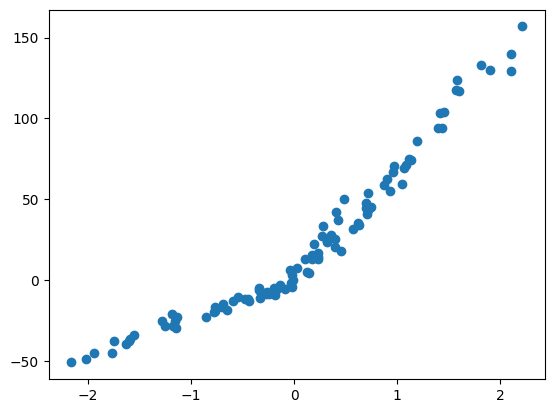

In [3]:
print(X.shape)
Y = Y.reshape(100,1)
print(Y.shape)
print(T.shape)
plt.scatter(X,Y)

In [4]:
X_ = np.hstack((X, np.ones(X.shape)))
X_ = np.hstack((X**2, X_))
X_.shape

(100, 3)

**Model**

In [5]:
def model(X, T):
  return np.dot(X,T)

**The cost function**

In [6]:
def cost_function(X, Y, T):
  return 1/(2*len(Y))*np.sum(model(X,T)-Y)**2

**The gradient**

In [7]:
def compute_gradient(X, Y, T):
  return 1/len(Y)*np.dot(np.transpose(X), model(X,T)-Y)

**The gradient descent**

In [8]:
def gradient_descent(X, Y, T, learning_rate, num_iterations):
  history = np.zeros(num_iterations)
  for i in range(num_iterations):
    T = T - learning_rate * compute_gradient(X,Y,T)
    history = cost_function(X,Y,T)
  return T , history

**The plot function**

In [9]:
def plot(X, Y, T, Z):
  plt.scatter(X, Y)
  plt.scatter(X, model(Z, T), c = 'r')

**Application**

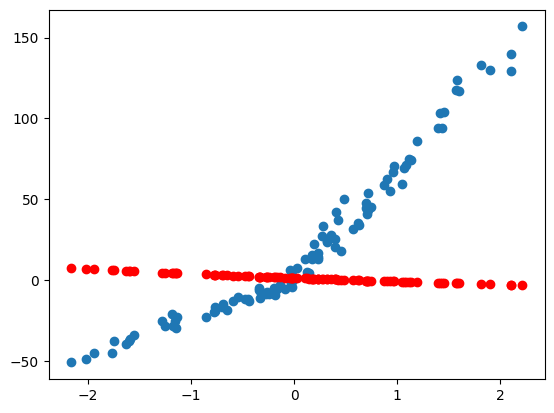

In [10]:
# Plot before applying the learning algorithm
plot(X,Y,T,X_)

In [11]:
# Define the hyperparameters
learning_rate = 0.1
num_iterations = 1000
# Apply the descent gradient algorithm
T,history = gradient_descent(X_, Y, T, learning_rate, num_iterations)

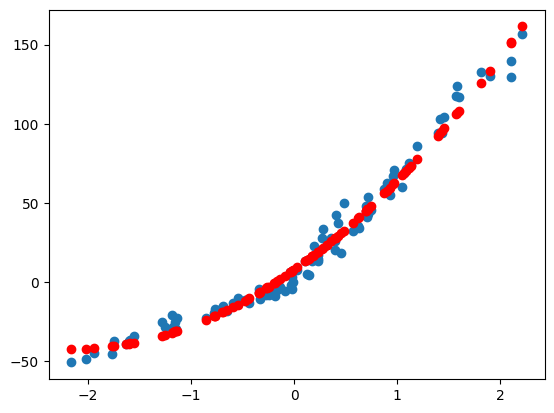

In [12]:
# Plot after applying the learning algorithm
plot(X,Y,T,X_)

In [13]:
#evaluate the performance of the model using R-square metric
from sklearn.metrics import r2_score
r = r2_score(Y,model(X_,T))
print("R2 :", r)

R2 : 0.981502849239648
